<a href="https://colab.research.google.com/github/cybervalient/DeepMD_AWV/blob/main/experimentBBBregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.5 MB 52 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.3-py2.py3-none-any.whl size=177541401 sha256=c7f5f66988321b37babc47b80849e0bc2a5b5465d0e75f8c3b87975286fa6675
  Stored in directory: /root/.cache/pip/wheels/16/f8/f4/69e1ff6a0d1cb61bdbc0d9888ee8437a1acf1eb1c6ffb8be20
Successfully built h2o


In [2]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp72c7ihgi
  JVM stdout: /tmp/tmp72c7ihgi/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp72c7ihgi/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_v6rwbc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [3]:
from google.colab import files  
uploaded = files.upload()

Saving BBB_AC.csv to BBB_AC.csv


In [4]:
import io 
df = h2o.import_file('BBB_AC.csv')
df.head()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


name,N3-NE-P-WH-T,1AC-NE(N2)-P-WH-T,1AC-NE(N3)-P-WH-T,1AC-NE(I50)-P-WH-T,3AC-NE(N3)-P-WH-T,5AC-NE(I50)-P-WH-T,1AC-NE(N3)-C-WH-T,2AC-NE(DE)-C-WH-T,3AC-NE(CV)-C-WH-T,2AC-NE(DE)-L-WH-T,2AC-NE(I50)-L-WH-T,1AC-NE(Q1)-HX-WH-T,3AC-NE(S)-HX-WH-T,4AC-NE(V)-HX-WH-T,4AC-NE(S)-HX-WH-T,4AC-NE(K)-HX-WH-T,5AC-NE(V)-HX-WH-T,5AC-NE(S)-HX-WH-T,5AC-NE(K)-HX-WH-T,1AC-NE(P3)-KU-WH-T,2AC-NE(P3)-KU-WH-T,3AC-NE(P3)-KU-WH-T,TAC-NE(A)-KU-WH-T,S-NE-Alk-WH-T,R-NE-Alk-WH-T,2AC-NE(S)-Alk-WH-T,3AC-NE(V)-Alk-WH-T,3AC-NE(S)-Alk-WH-T,3AC-NE(K)-Alk-WH-T,4AC-NE(V)-Alk-WH-T,4AC-NE(S)-Alk-WH-T,4AC-NE(K)-Alk-WH-T,5AC-NE(V)-Alk-WH-T,5AC-NE(S)-Alk-WH-T,5AC-NE(K)-Alk-WH-T,6AC-NE(V)-Alk-WH-T,6AC-NE(K)-Alk-WH-T,6AC-NE(DE)-Alk-WH-T,TAC-NE(S)-Alk-WH-T,TAC-NE(R)-Alk-WH-T,1AC-NE(N2)-IN4-WH-T,1AC-NE(N2)-IN5-WH-T,4AC-NE(MX)-IN10-WH-T,5AC-NE(MX)-IN10-WH-T,6AC-NE(MX)-IN10-WH-T,5AC-NE(MX)-IN11-WH-T,6AC-NE(MX)-IN11-WH-T,4AC-NE(MX)-IN12-WH-T,5AC-NE(MX)-IN12-WH-T,6AC-NE(MX)-IN12-WH-T,1AC-NE(Q2)-IN13-WH-T,1AC-NE(Q2)-IN14-WH-T,1AC-NE(Q2)-IN15-WH-T,2AC-NE(R)-DC3-WH-T,4AC-NE(S)-DC3-WH-T,4AC-NE(R)-DC3-WH-T,5AC-NE(V)-DC3-WH-T,5AC-NE(S)-DC3-WH-T,5AC-NE(K)-DC3-WH-T,5AC-NE(R)-DC3-WH-T,6AC-NE(S)-DC3-WH-T,6AC-NE(R)-DC3-WH-T,TAC-NE(V)-DC3-WH-T,TAC-NE(S)-DC3-WH-T,TAC-NE(K)-DC3-WH-T,TAC-NE(R)-DC3-WH-T,P3-NE-P-WH-HT,A-NE-P-WH-HT,TAC-NE(Q2)-IN16-WH-HT,TAC-NE(Q2)-IN17-WH-HT,TAC-NE(Q2)-IN18-WH-HT,TAC-NE(I50)-DC2-WH-HT,P3-NE-P-WH-HA,A-NE-P-WH-HA,MX-NE-P-WH-HA,TAC-NE(Q2)-IN16-WH-HA,TAC-NE(Q2)-IN17-WH-HA,TAC-NE(Q2)-IN18-WH-HA,TAC-NE(I50)-DC2-WH-HA,1AC-NE(P2)-P-WH-IS,1AC-NE(P3)-P-WH-IS,1AC-NE(A)-P-WH-IS,TAC-NE(P3)-P-WH-IS,TAC-NE(A)-P-WH-IS,MX-NE-IN16-WH-IS,MX-NE-IN17-WH-IS,MX-NE-IN18-WH-IS,TAC-NE(I50)-DC2-WH-IS,TAC-NE(I50)-DC4-WH-IS,A-NE-P-WH-LA,1AC-NE(I50)-P-WH-LA,2AC-NE(PN)-P-WH-LA,3AC-NE(A)-P-WH-LA,3AC-NE(MN)-P-WH-LA,4AC-NE(PN)-P-WH-LA,5AC-NE(PN)-P-WH-LA,6AC-NE(PN)-P-WH-LA,K-NE-C-WH-LA,2AC-NE(I50)-C-WH-LA,3AC-NE(MX)-C-WH-LA,1AC-NE(I50)-L-WH-LA,3AC-NE(PN)-L-WH-LA,TAC-NE(MX)-L-WH-LA,2AC-NE(N1)-HX-WH-LA,2AC-NE(R)-HX-WH-LA,2AC-NE(Q1)-HX-WH-LA,2AC-NE(Q3)-HX-WH-LA,3AC-NE(N1)-HX-WH-LA,3AC-NE(PN)-HX-WH-LA,3AC-NE(Q1)-HX-WH-LA,3AC-NE(Q3)-HX-WH-LA,3AC-NE(I50)-HX-WH-LA,3AC-NE(MX)-HX-WH-LA,4AC-NE(PN)-HX-WH-LA,4AC-NE(Q1)-HX-WH-LA,4AC-NE(Q3)-HX-WH-LA,4AC-NE(I50)-HX-WH-LA,4AC-NE(MX)-HX-WH-LA,5AC-NE(N2)-HX-WH-LA,5AC-NE(PN)-HX-WH-LA,5AC-NE(Q1)-HX-WH-LA,5AC-NE(Q3)-HX-WH-LA,5AC-NE(I50)-HX-WH-LA,5AC-NE(MX)-HX-WH-LA,6AC-NE(PN)-HX-WH-LA,6AC-NE(Q1)-HX-WH-LA,6AC-NE(Q3)-HX-WH-LA,6AC-NE(MX)-HX-WH-LA,7AC-NE(PN)-HX-WH-LA,8AC-NE(PN)-HX-WH-LA,DE-NE-KU-WH-LA,TAC-NE(R)-KU-WH-LA,1AC-NE(R)-Alk-WH-LA,1AC-NE(Q1)-Alk-WH-LA,1AC-NE(Q3)-Alk-WH-LA,2AC-NE(Q1)-Alk-WH-LA,2AC-NE(Q2)-Alk-WH-LA,2AC-NE(Q3)-Alk-WH-LA,2AC-NE(I50)-Alk-WH-LA,3AC-NE(PN)-Alk-WH-LA,3AC-NE(Q1)-Alk-WH-LA,3AC-NE(Q3)-Alk-WH-LA,3AC-NE(I50)-Alk-WH-LA,3AC-NE(MX)-Alk-WH-LA,4AC-NE(PN)-Alk-WH-LA,4AC-NE(Q1)-Alk-WH-LA,4AC-NE(Q2)-Alk-WH-LA,4AC-NE(Q3)-Alk-WH-LA,4AC-NE(I50)-Alk-WH-LA,4AC-NE(MX)-Alk-WH-LA,5AC-NE(N2)-Alk-WH-LA,5AC-NE(PN)-Alk-WH-LA,5AC-NE(Q1)-Alk-WH-LA,5AC-NE(Q3)-Alk-WH-LA,5AC-NE(I50)-Alk-WH-LA,6AC-NE(PN)-Alk-WH-LA,6AC-NE(I50)-Alk-WH-LA,7AC-NE(PN)-Alk-WH-LA,5AC-NE(N2)-IN7-WH-LA,5AC-NE(N2)-IN8-WH-LA,5AC-NE(N2)-IN9-WH-LA,4AC-NE(N3)-IN10-WH-LA,4AC-NE(N3)-IN11-WH-LA,5AC-NE(N3)-IN11-WH-LA,4AC-NE(N3)-IN12-WH-LA,1AC-NE(N1)-DC2-WH-LA,1AC-NE(Q1)-DC2-WH-LA,1AC-NE(Q2)-DC2-WH-LA,1AC-NE(Q3)-DC2-WH-LA,1AC-NE(I50)-DC2-WH-LA,1AC-NE(MN)-DC2-WH-LA,2AC-NE(Q1)-DC2-WH-LA,2AC-NE(Q2)-DC2-WH-LA,2AC-NE(Q3)-DC2-WH-LA,3AC-NE(Q1)-DC2-WH-LA,3AC-NE(Q3)-DC2-WH-LA,4AC-NE(Q1)-DC2-WH-LA,4AC-NE(Q3)-DC2-WH-LA,5AC-NE(Q1)-DC2-WH-LA,5AC-NE(Q3)-DC2-WH-LA,TAC-NE(Q1)-DC2-WH-LA,TAC-NE(Q3)-DC2-WH-LA,TAC-NE(I50)-DC2-WH-LA,TAC-NE(MX)-DC2-WH-LA,PN-NE-DC3-WH-LA,2AC-NE(Q2)-DC3-WH-LA,2AC-NE(MN)-DC3-WH-LA,3AC-NE(Q2)-DC3-WH-LA,3AC-NE(MN)-DC3-WH-LA,4AC-NE(Q2)-DC3-WH-LA,4AC-NE(MN)-DC3-WH-LA,5AC-NE(Q2)-DC3-WH-LA,5AC-NE(MN)-DC3-WH-LA,6AC-NE(Q2)-DC3-WH-LA,6AC-NE(MN)-DC3-WH-LA,TAC-NE(Q1)-DC3-WH-LA,TAC-NE(Q2)-DC3-WH-LA,TAC-NE(Q3)-DC3-WH-LA,TAC-NE(MN)-DC3-WH-LA
A001_ICI17148.mol_A001_ICI17148,8.75365,28.773,18.6434,2.03617,33.7296,

In [5]:
print(f'Size of training set: {df.shape[0]} rows and {df.shape[1]} columns')

Size of training set: 580 rows and 201 columns


In [6]:
splits = df.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]

In [8]:
y = "log BBB" 
x = df.columns 
x.remove(y) 
x.remove("name")


In [9]:
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(x=x,y=y, training_frame=train)

lb = aml.leaderboard
lb.head()

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_3_AutoML_1_20230103_33507,1.24184,1.54216,0.679742,nan,1.54216
GBM_5_AutoML_1_20230103_33507,1.26884,1.60996,0.624383,nan,1.60996
XRT_1_AutoML_1_20230103_33507,1.30449,1.70168,0.630847,nan,1.70168
XGBoost_grid_1_AutoML_1_20230103_33507_model_8,1.3125,1.72266,0.602327,nan,1.72266
XGBoost_grid_1_AutoML_1_20230103_33507_model_2,1.34394,1.80616,0.682243,nan,1.80616
DRF_1_AutoML_1_20230103_33507,1.46234,2.13843,0.623591,nan,2.13843
XGBoost_grid_1_AutoML_1_20230103_33507_model_3,1.47117,2.16434,0.712334,nan,2.16434
GBM_grid_1_AutoML_1_20230103_33507_model_2,1.49793,2.24379,0.708186,nan,2.24379
GBM_grid_1_AutoML_1_20230103_33507_model_1,1.54687,2.39279,0.738385,nan,2.39279
XGBoost_grid_1_AutoML_1_20230103_33507_model_7,1.56675,2.45471,0.721288,nan,2.45471


In [ ]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])


In [11]:
metalearner

,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,"Elastic Net (alpha = 0.5, lambda = 1.4265E7 )",12,1,1,levelone_training_StackedEnsemble_AllModels_2_AutoML_1_20230103_33507
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.8938892,0.0559073,0.9041361,0.8430555,0.9859819,0.8698636,0.8664091
mean_residual_deviance,4.9193635,3.021247,3.26115,2.4398062,8.260795,8.15757,2.4774964
mse,4.9193635,3.021247,3.26115,2.4398062,8.260795,8.15757,2.4774964
null_deviance,434.70633,242.6645,303.3441,243.98062,726.8438,668.90643,230.4567
r2,-0.0015834,0.0014638,-0.0022043,-0.0000652,-0.0034037,-0.0000871,-0.0021564
residual_deviance,434.70908,242.71803,303.28693,243.98062,726.9499,668.9207,230.40717
rmse,2.134433,0.6741278,1.8058654,1.5619879,2.8741598,2.856146,1.5740066
rmsle,nan,0.0,nan,nan,nan,nan,nan


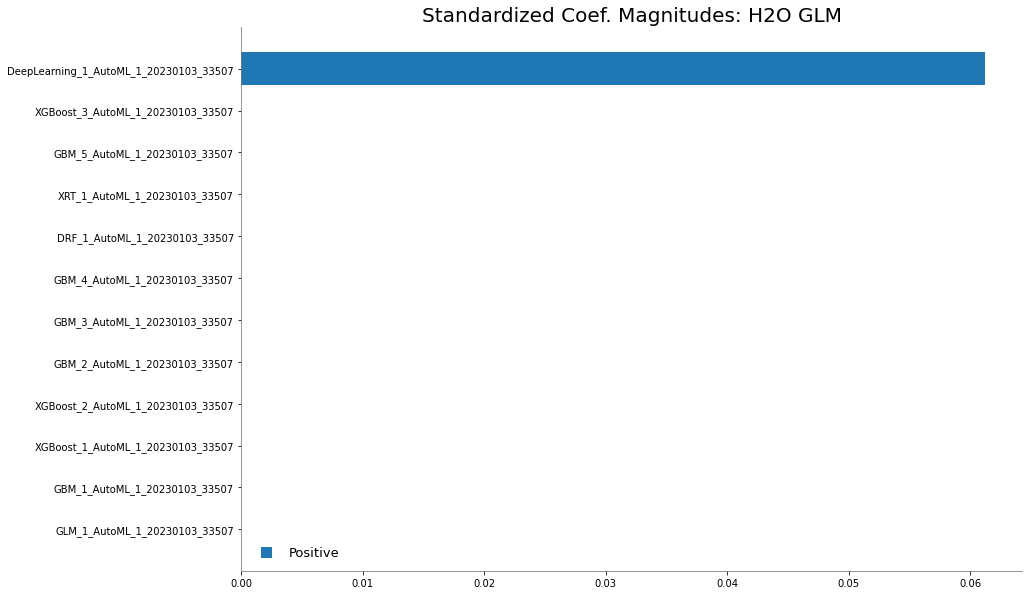

In [12]:
%matplotlib inline
metalearner.std_coef_plot()

In [13]:
pred = aml.predict(test)
pred.head()

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


predict
-0.635665
-0.0846151
-0.112205
0.53842
0.56316
0.135978
0.378046
-0.653752
-0.165493
1.19115
